<hr style="height:2px;border:none"/>
<img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">

<center>
    <h1> INF396 - Introducción a la Ciencia de Datos </h1>
    <h1> Proyecto</h1>
    <h1> Dataset Santander Costumer Satisfaction</h1>
</center>
<br>
<hr style="height:2px;border:none"/>

In [56]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from sklearn import svm  
from keras.layers import Dropout

# Visualización de datos

In [2]:
df = pd.read_csv("santander-customer-satisfaction/train.csv",index_col=0)
df_test = pd.read_csv("santander-customer-satisfaction/test.csv",index_col=0)

In [3]:
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
df_test.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [5]:
def sparsity(A):
    # Calculamos la cantidad de elementos no nulos de A
    cantidad_no_ceros = np.count_nonzero(A)
    
    # Calculamos el total de elementos de A
    total_elementos = A.size
    
    # Calculamos la sparsity
    sparsity = 1 - cantidad_no_ceros/total_elementos
    
    return sparsity

sparsity(df)

0.9091549165582314

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
imp_op_var39_comer_ult3,76020.0,119.529632,546.266294,0.00,0.0000,0.00,0.0000,21024.81
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


<AxesSubplot:>

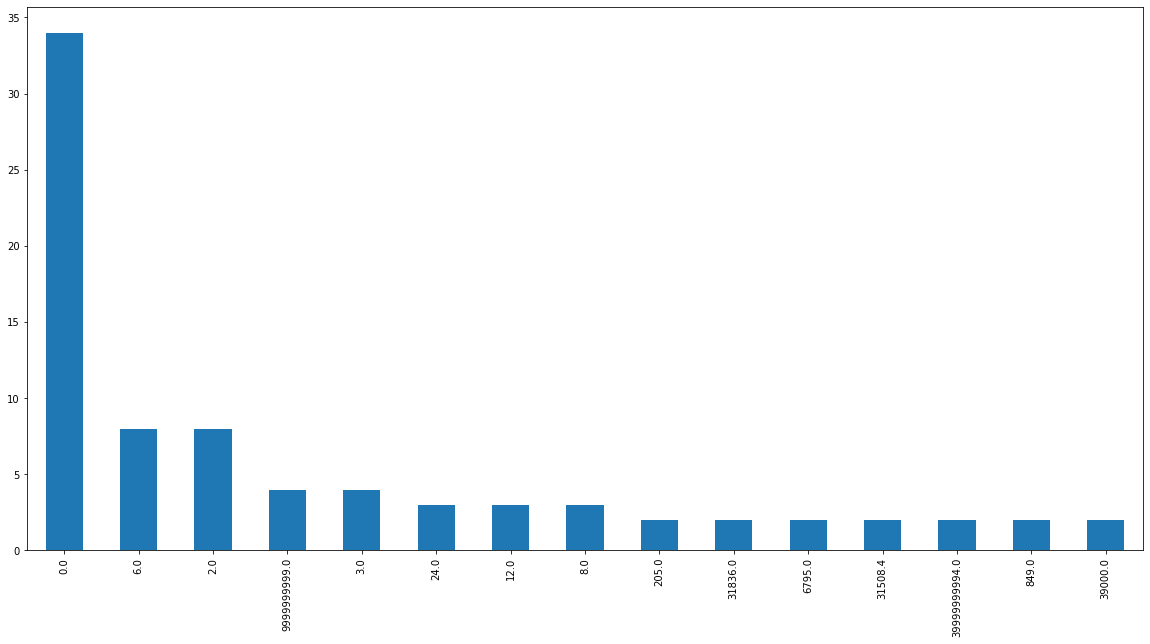

In [7]:
df.sum().sort_values().value_counts().iloc[:15].plot.bar(figsize=(20, 10))

<AxesSubplot:>

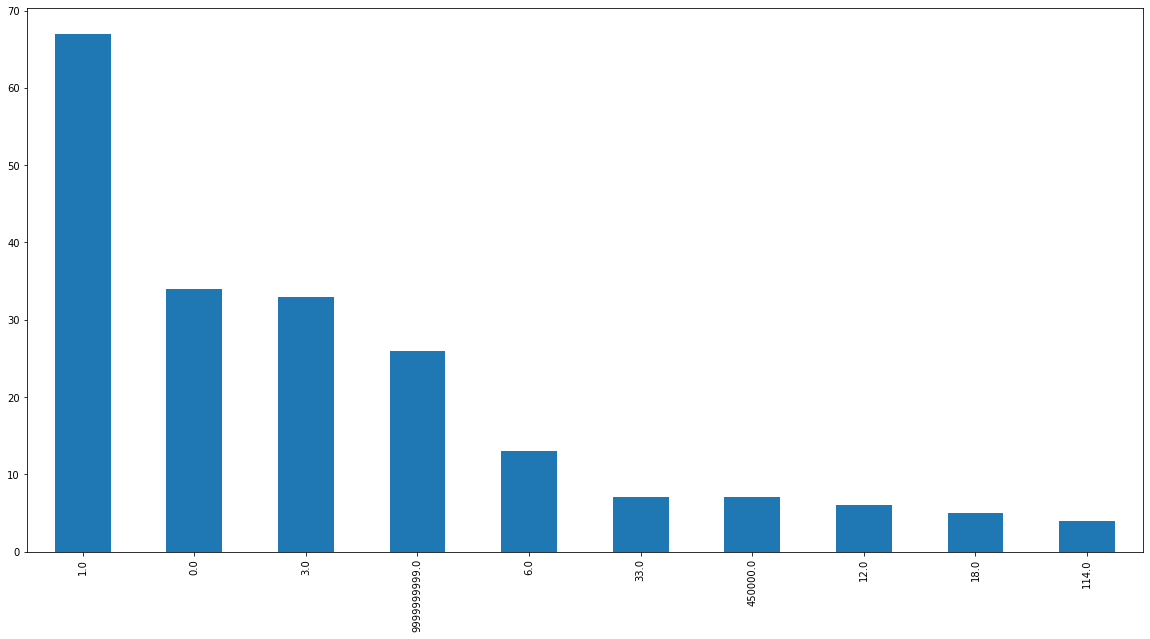

In [8]:
df.max().sort_values(ascending = False).value_counts().iloc[:10].plot.bar(figsize=(20, 10))

In [9]:
for col in df.columns:
    if len(df[df[col] == 9999999999].values) != 0:
        print("moda:",df[col].mode()[0], "| mediana:",df[col].median())

moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0.0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0 | mediana: 0.0
moda: 0.0 | mediana: 0.0


<AxesSubplot:>

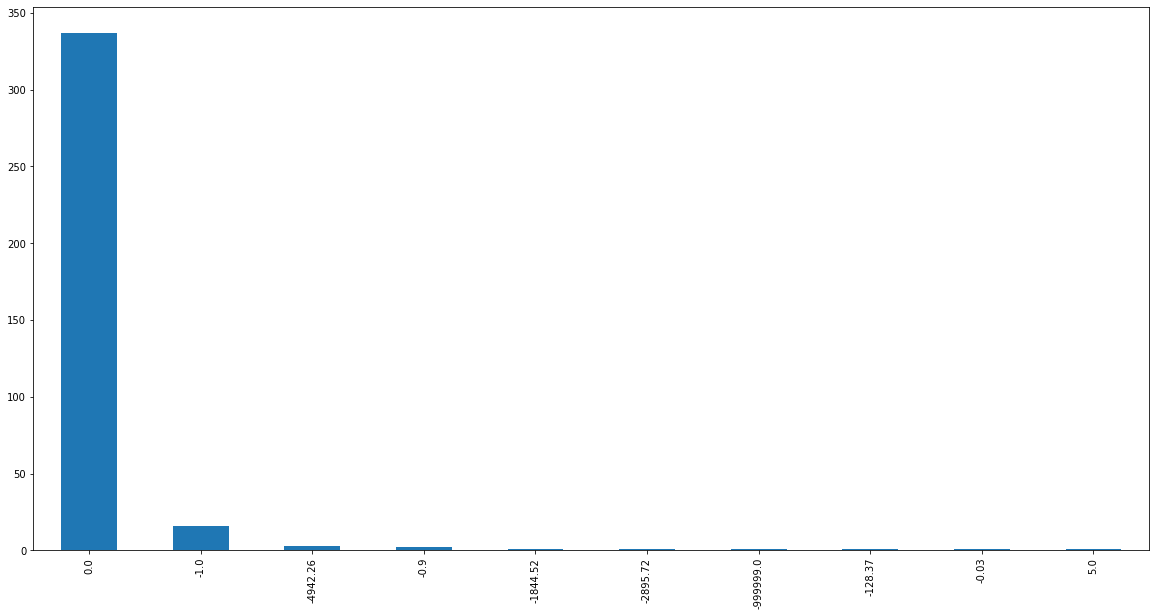

In [10]:
df.min().sort_values().value_counts().iloc[:10].plot.bar(figsize=(20, 10))

In [11]:
for col in df.columns:
    if len(df[df[col] == -999999].values) != 0:
        print("moda:",df[col].mode()[0], "| mediana:",df[col].median())

moda: 2 | mediana: 2.0


<AxesSubplot:>

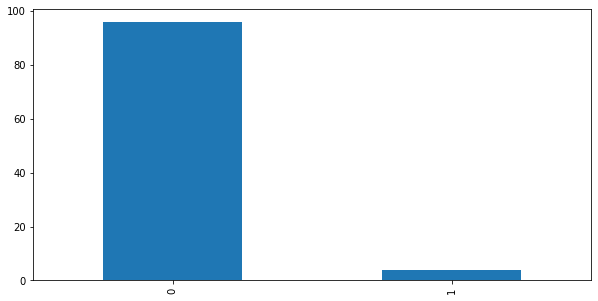

In [12]:
target = pd.DataFrame(df.TARGET.value_counts())
target['Percentage'] = 100*target['TARGET']/df.shape[0]
target['Percentage'].plot.bar(figsize=(10, 5))


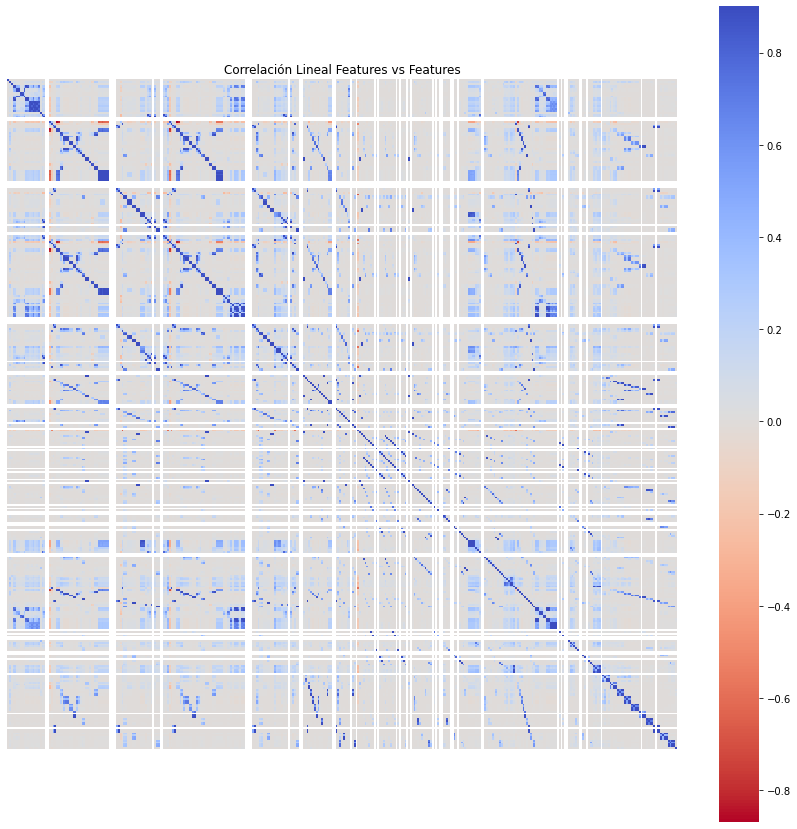

In [13]:
corrmat = df_test.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="coolwarm_r",yticklabels=False,xticklabels=False)
ax.set_title("Correlación Lineal Features vs Features")
plt.show()

## Preprocesamiento

In [14]:
random_state = 0
df.shape

(76020, 370)

In [15]:
df = df.replace(-999999,2)
df = df.replace(-9999999999,0)

In [16]:
def getDuplicateColumns(df):
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

col_duplicadas_df = getDuplicateColumns(df)
col_duplicadas_df_test = getDuplicateColumns(df_test)

### Pipelines

In [17]:
def pipeline_columnas(df):
    for columna in col_duplicadas_df:
        if columna in col_duplicadas_df_test:
            df = df.drop([columna],axis=1)
    return df

def pipeline_under_sampling(df,ratio):
    class_count_0, class_count_1 = df['TARGET'].value_counts()
    class_0 = df[df['TARGET'] == 0]
    class_1 = df[df['TARGET'] == 1]
    class_0_under = class_0.sample(class_count_1*ratio)
    df = pd.concat([class_0_under, class_1], axis=0)
    return df

def pipeline_ambos(df,ratio):
    df = pipeline_columnas(df)
    df = pipeline_under_sampling(df,ratio)
    return df

    

In [18]:
df_p1 = pipeline_columnas(df)
df_p2_1 = pipeline_under_sampling(df,1)
df_p2_6 = pipeline_under_sampling(df,6)
df_p3_1 = pipeline_ambos(df,1)
df_p3_6 = pipeline_ambos(df,6)

In [19]:
print("Shapes:")
print("df_p1:",df_p1.shape)
print("df_p2_1:",df_p2_1.shape)
print("df_p2_6:",df_p2_6.shape)
print("df_p3_1:",df_p3_1.shape)
print("df_p3_6:",df_p3_6.shape)

Shapes:
df_p1: (76020, 310)
df_p2_1: (6016, 370)
df_p2_6: (21056, 370)
df_p3_1: (6016, 310)
df_p3_6: (21056, 310)


In [20]:
def std_pca(df):
    target = df.TARGET
    features = df.drop(['TARGET'],axis=1)
    x_train, x_val, y_train, y_val = train_test_split(features,target,test_size=0.3,random_state=0,stratify=target)
    
    scaler = StandardScaler()
    scaled_features = scaler.fit(x_train)
    pipe_Xtrain = scaled_features.transform(x_train)
    pipe_Xval = scaled_features.transform(x_val)
    
    pca = PCA(0.99, random_state=random_state)
    pca.fit(pipe_Xtrain)
    pca_pipe_xtrain = pca.transform(pipe_Xtrain)
    pca_pipe_xval = pca.transform(pipe_Xval)
    print("Shapes Xtrain,Ytrain:",pca_pipe_xtrain.shape,y_train.shape)
    print("Shapes Xval,Yval:",pca_pipe_xval.shape,y_val.shape)
    
    return pca_pipe_xtrain,pca_pipe_xval,y_train,y_val

### Pipeline 1: Columnas duplicadas

In [21]:
p1_xtrain,p1_xval,p1_ytrain,p1_yval = std_pca(df_p1)

Shapes Xtrain,Ytrain: (53214, 141) (53214,)
Shapes Xval,Yval: (22806, 141) (22806,)


### Pipeline 2: Under Sampling

In [22]:
p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval = std_pca(df_p2_1)
p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval = std_pca(df_p2_6)

Shapes Xtrain,Ytrain: (4211, 92) (4211,)
Shapes Xval,Yval: (1805, 92) (1805,)
Shapes Xtrain,Ytrain: (14739, 115) (14739,)
Shapes Xval,Yval: (6317, 115) (6317,)


### Pipeline 3: Ambos

In [23]:
p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval = std_pca(df_p3_1)
p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval = std_pca(df_p3_6)

Shapes Xtrain,Ytrain: (4211, 90) (4211,)
Shapes Xval,Yval: (1805, 90) (1805,)
Shapes Xtrain,Ytrain: (14739, 119) (14739,)
Shapes Xval,Yval: (6317, 119) (6317,)


# Modelos

# Logistic Reggresion

In [103]:
def lr(xtrain,xval,ytrain,yval):
    t1 = time.time()
    logistic_regression = LogisticRegression(max_iter = 1000,class_weight='balanced')
    logistic_regression.fit(xtrain, ytrain)
    y_pred = logistic_regression.predict(xval)
    t2 = time.time()
    cf_logistic_regression = confusion_matrix(yval,y_pred)
    roc = roc_auc_score(yval,y_pred)
    print("Roc_score:",roc)
    sns.heatmap(cf_logistic_regression, annot=True)
    print("Tiempo:",t2-t1)
    return roc

### Pipeline 1

Roc_score: 0.7052998551226962
Tiempo: 10.826111078262329


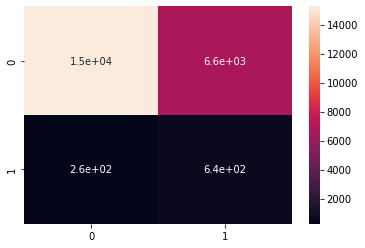

In [105]:
roc_lr_p1 = lr(p1_xtrain,p1_xval,p1_ytrain,p1_yval)

### Pipeline 2

Roc_score: 0.705832124011364
Tiempo: 0.2708442211151123


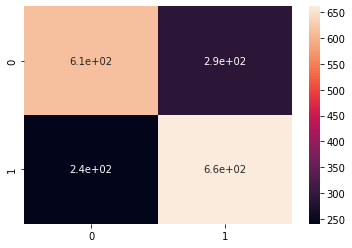

In [106]:
roc_lr_p2_1 = lr(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval)

Roc_score: 0.720056793869374
Tiempo: 2.0692949295043945


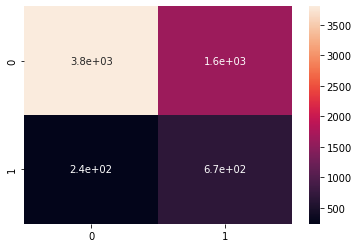

In [107]:
roc_lr_p2_6 = lr(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval)

### Pipeline 3

Roc_score: 0.7158013568960818
Tiempo: 0.2492365837097168


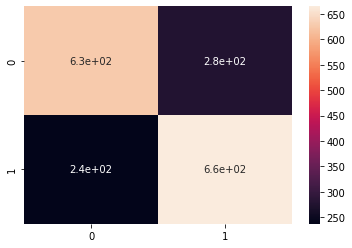

In [108]:
roc_lr_p3_1 = lr(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval)

Roc_score: 0.7131322003222551
Tiempo: 1.7191979885101318


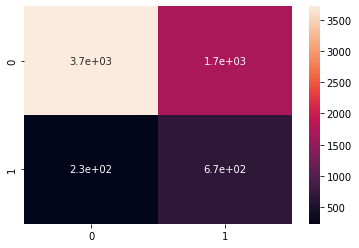

In [109]:
roc_lr_p3_6 = lr(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# Árboles

In [110]:
def tree(xtrain,xval,ytrain,yval):
    t1 = time.time()
    decision_tree = DecisionTreeClassifier(random_state=0,class_weight='balanced')
    decision_tree.fit(xtrain, ytrain)
    y_pred = decision_tree.predict(xval)
    t2 = time.time()
    cf_decision_tree = confusion_matrix(yval,y_pred)
    roc = roc_auc_score(yval,y_pred)
    print("Roc_score:",roc)
    sns.heatmap(cf_decision_tree, annot=True)
    print("Tiempo:",t2-t1)
    return roc

### Pipeline 1

Roc_score: 0.5540575464149953
Tiempo: 11.844424486160278


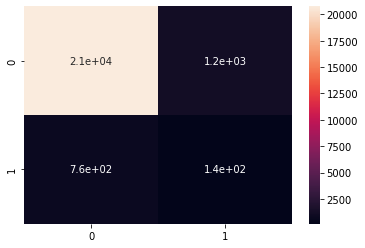

In [111]:
roc_tree_p1 = tree(p1_xtrain,p1_xval,p1_ytrain,p1_yval)

### Pipeline 2

Roc_score: 0.6498693686725451
Tiempo: 0.43401122093200684


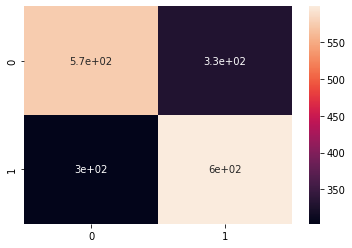

In [112]:
roc_tree_p2_1 = tree(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval)

Roc_score: 0.6066452307686009
Tiempo: 2.241547107696533


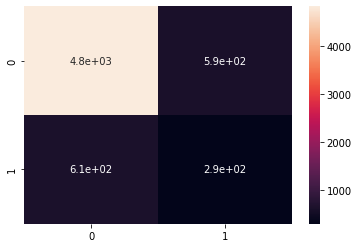

In [113]:
roc_tree_p2_6 = tree(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval)

### Pipeline 3

Roc_score: 0.6437865405534152
Tiempo: 0.4448096752166748


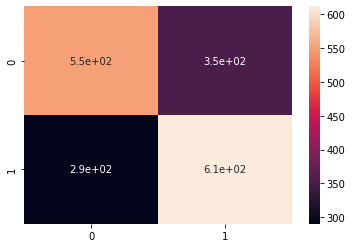

In [114]:
roc_tree_p3_1 = tree(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval)

Roc_score: 0.6023066623262556
Tiempo: 2.703268051147461


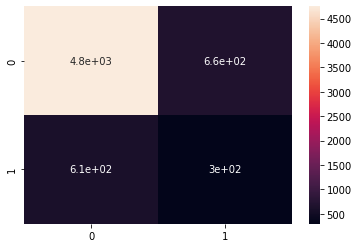

In [115]:
roc_tree_p3_6 = tree(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# Bosques

In [116]:
def forest(xtrain,xval,ytrain,yval):
    t1 = time.time()
    random_forest = RandomForestClassifier(max_depth=2,class_weight='balanced')
    random_forest.fit(xtrain, ytrain)
    ypred = random_forest.predict(xval)
    t2 = time.time()
    cf = confusion_matrix(yval,ypred)
    roc = roc_auc_score(yval,ypred)
    print("Roc_score:",roc)
    sns.heatmap(cf, annot=True)
    print("Tiempo:",t2-t1)
    return roc

### Pipeline 1

Roc_score: 0.7025105722370061
Tiempo: 12.130275011062622


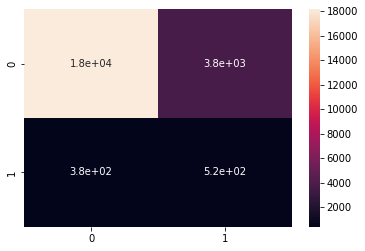

In [117]:
roc_forest_p1 = forest(p1_xtrain,p1_xval,p1_ytrain,p1_yval)

### Pipeline 2

Roc_score: 0.7140757710808759
Tiempo: 0.7551131248474121


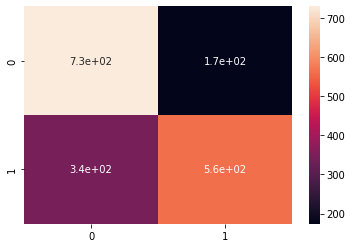

In [118]:
roc_forest_p2_1 = forest(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval)

Roc_score: 0.7120796506378562
Tiempo: 2.6966848373413086


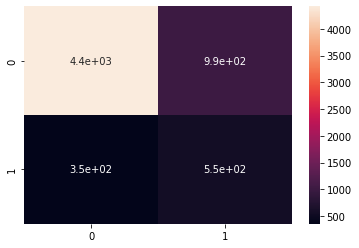

In [119]:
roc_forest_p2_6 = forest(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval)

### Pipeline 3

Roc_score: 0.7079825071884063
Tiempo: 0.7360649108886719


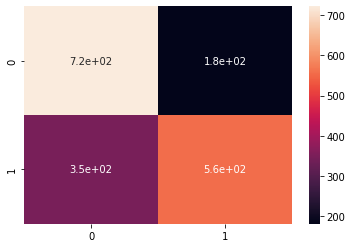

In [120]:
roc_forest_p3_1 = forest(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval)

Roc_score: 0.700806354198017
Tiempo: 2.7127490043640137


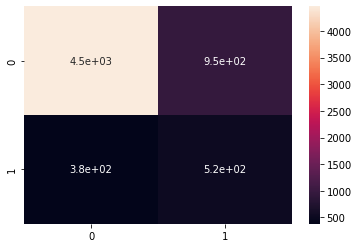

In [121]:
roc_forest_p3_6 = forest(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# Gausiano NB

In [124]:
def gaussian(xtrain,xval,ytrain,yval):
    t1 = time.time()
    red_bayesiana = GaussianNB()
    red_bayesiana.fit(xtrain, ytrain)
    y_pred = red_bayesiana.predict(xval)
    t2 = time.time()
    cf_red_bayesiana = confusion_matrix(yval,y_pred)
    sns.heatmap(cf_red_bayesiana, annot=True)
    roc = roc_auc_score(yval,y_pred)
    print("Roc_score:",roc)
    print("Tiempo:",t2-t1)
    return roc

### Pipeline 1

Roc_score: 0.5177336521065921
Tiempo: 0.2184445858001709


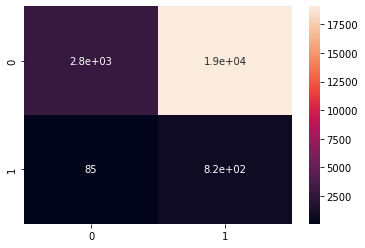

In [125]:
roc_gaussian_p1 = gaussian(p1_xtrain,p1_xval,p1_ytrain,p1_yval)

### Pipeline 2

Roc_score: 0.517116509884519
Tiempo: 0.015957355499267578


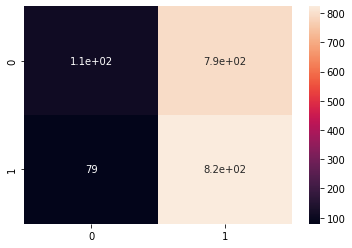

In [44]:
roc_gaussian_p2_1 = gaussian(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval)

Roc_score: 0.5294284988933999
Tiempo: 0.05684709548950195


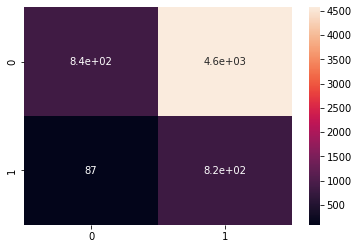

In [45]:
roc_gaussian_p2_6 = gaussian(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval)

### Pipeline 3

Roc_score: 0.5392704289471164
Tiempo: 0.016495704650878906


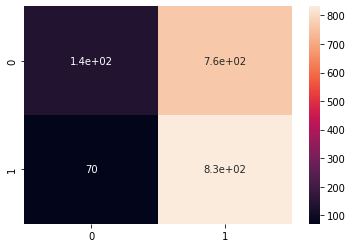

In [46]:
roc_gaussian_p3_1 = gaussian(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval)

Roc_score: 0.5273007761555832
Tiempo: 0.06382966041564941


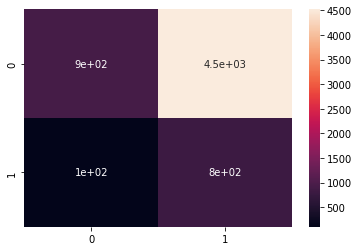

In [47]:
roc_gaussian_p3_6 = gaussian(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# SVC

In [50]:
def svc(X_train,X_val,y_train,y_val):
    t1 = time.time()
    clf = svm.SVC(C=0.001) 
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_val)
    t2 = time.time()
    cf_svc = confusion_matrix(y_val,y_pred)
    sns.heatmap(cf_svc, annot=True)
    roc= roc_auc_score(y_val,y_pred)
    print("Roc_score:",roc)
    print("Tiempo:",t2-t1)
    return roc

### Pipeline 1 

Roc_score: 0.5
Tiempo: 51.7266001701355


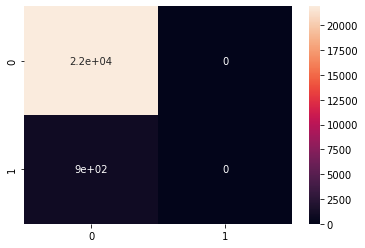

In [51]:
roc_svc_p1 = svc(p1_xtrain,p1_xval,p1_ytrain,p1_yval) 

### Pipeline 2 

Roc_score: 0.5
Tiempo: 3.573070764541626


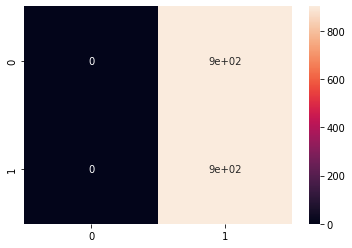

In [61]:
roc_svc_p2_1 = svc(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval) 

Roc_score: 0.5
Tiempo: 14.02078104019165


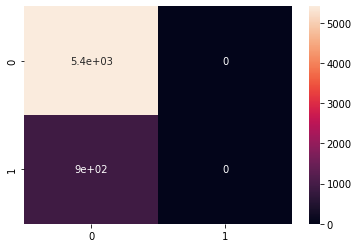

In [62]:
roc_svc_p2_6 = svc(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval) 

### Pipeline 3 

Roc_score: 0.5
Tiempo: 3.9488260746002197


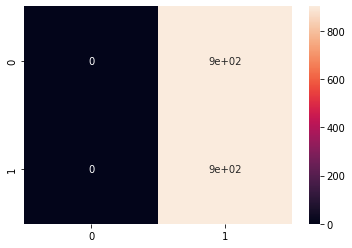

In [63]:
roc_svc_p3_1 = svc(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval) 

Roc_score: 0.5
Tiempo: 14.189639568328857


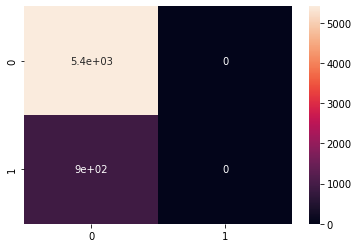

In [64]:
roc_svc_p3_6 = svc(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# Redes Neuronales

In [52]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [TARGET]')
    plt.legend()
    plt.grid(True)
    plt.show()

# Red Neuronal 1 Capa

In [59]:
def nn_1(xtrain,xval,ytrain,yval):
    dropout = 0.3
    loss = "binary_crossentropy"
    t1 = time.time()
    model = tf.keras.Sequential()
    model.add(Dropout(dropout))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=[tf.keras.metrics.AUC(from_logits=True)])
    history_1 = model.fit(xtrain, ytrain, epochs=150,verbose=0,validation_split = 0.2)
    _, roc = model.evaluate(xval, yval,verbose=0)
    t2 = time.time()
    print("Roc_score:",roc)
    print("Tiempo:",t2-t1)
    plot_loss(history_1)
    return roc

### Pipeline 1 

Roc_score: 0.7484580278396606
Tiempo: 272.9102716445923


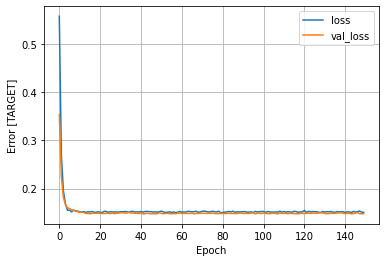

In [60]:
roc_nn1_p1 = nn_1(p1_xtrain,p1_xval,p1_ytrain,p1_yval) 

### Pipeline 2 

Roc_score: 0.7847886085510254
Tiempo: 26.44785761833191


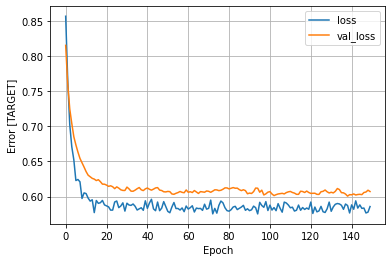

In [65]:
roc_nn1_p2_1 = nn_1(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval) 

Roc_score: 0.7901653051376343
Tiempo: 83.81211638450623


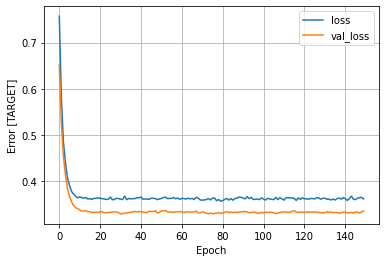

In [66]:
roc_nn1_p2_6 = nn_1(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval) 

### Pipeline 3 

Roc_score: 0.7872213125228882
Tiempo: 29.006747722625732


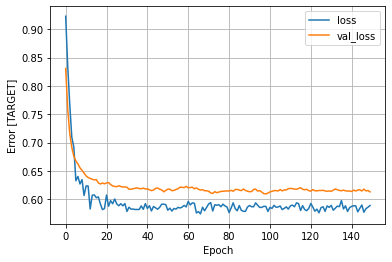

In [67]:
roc_nn1_p3_1 = nn_1(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval) 

Roc_score: 0.7852449417114258
Tiempo: 85.56352066993713


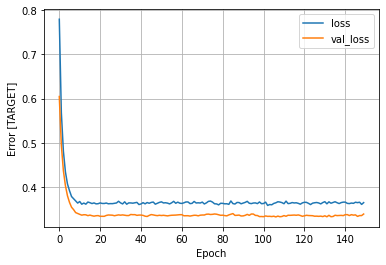

In [68]:
roc_nn1_p3_6 = nn_1(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# Red Neuronal 3 Capas

In [69]:
def nn_3(xtrain,xval,ytrain,yval):
    dropout = 0.3
    loss = "binary_crossentropy"
    t1 = time.time()
    model = tf.keras.Sequential()
    model.add(Dense(50,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(15,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=[tf.keras.metrics.AUC(from_logits=True)])
    history_3 = model.fit(xtrain, ytrain, epochs=150,verbose=0,validation_split = 0.2)
    _, roc = model.evaluate(xval, yval,verbose=0)
    t2 = time.time()
    print("Roc_score:",roc)
    print("Tiempo:",t2-t1)
    plot_loss(history_3)
    return roc

### Pipeline 1 

Roc_score: 0.7748056054115295
Tiempo: 260.63653683662415


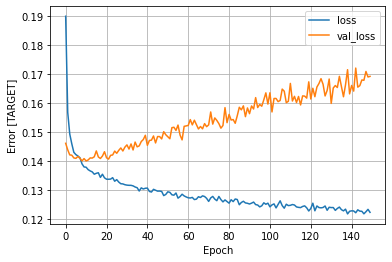

In [70]:
roc_nn3_p1 = nn_3(p1_xtrain,p1_xval,p1_ytrain,p1_yval) 

### Pipeline 2 

Roc_score: 0.7978240251541138
Tiempo: 23.229389905929565


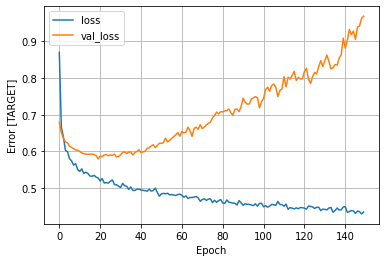

In [71]:
roc_nn3_p2_1 = nn_3(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval) 

Roc_score: 0.8085859417915344
Tiempo: 72.9758894443512


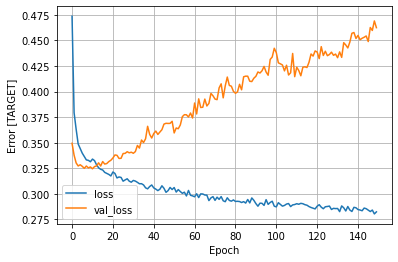

In [72]:
roc_nn3_p2_6 = nn_3(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval) 

### Pipeline 3 

Roc_score: 0.7925834655761719
Tiempo: 23.677366495132446


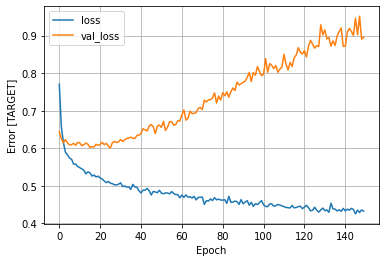

In [73]:
roc_nn3_p3_1 = nn_3(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval) 

Roc_score: 0.7975463271141052
Tiempo: 77.13736963272095


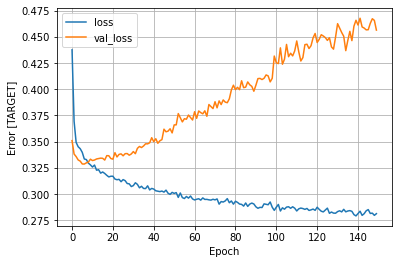

In [74]:
roc_nn3_p3_6 = nn_3(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# Red Neuronal 6 Capas

In [75]:
def nn_6(xtrain,xval,ytrain,yval):
    dropout = 0.3
    loss = "binary_crossentropy"
    t1 = time.time()
    model = tf.keras.Sequential()
    model.add(Dense(100,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(75,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(50,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(35,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(15,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=[tf.keras.metrics.AUC(from_logits=True)])
    history_6 = model.fit(xtrain, ytrain, epochs=150,verbose=0,validation_split = 0.2)
    _, roc = model.evaluate(xval, yval,verbose=0)
    t2 = time.time()
    print("Roc_score:",roc)
    print("Tiempo:",t2-t1)
    plot_loss(history_6)
    return roc

### Pipeline 1 

Roc_score: 0.7715266942977905
Tiempo: 371.46426463127136


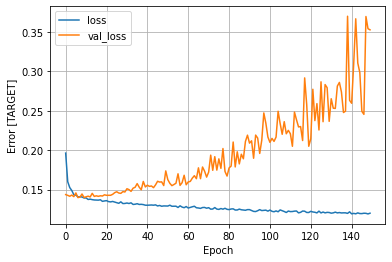

In [76]:
roc_nn6_p1 = nn_6(p1_xtrain,p1_xval,p1_ytrain,p1_yval) 

### Pipeline 2 

Roc_score: 0.7764607667922974
Tiempo: 32.77446532249451


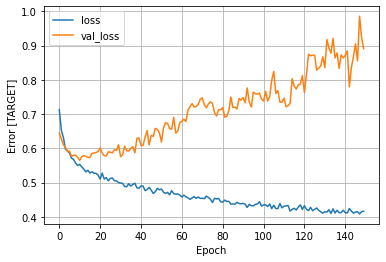

In [77]:
roc_nn6_p2_1 = nn_6(p2_1_xtrain,p2_1_xval,p2_1_ytrain,p2_1_yval) 

Roc_score: 0.7922810316085815
Tiempo: 104.6751356124878


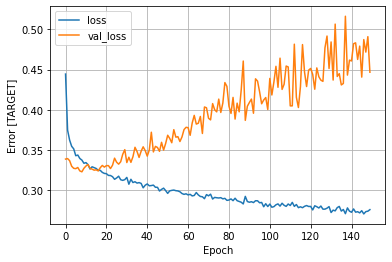

In [78]:
roc_nn6_p2_6 = nn_6(p2_6_xtrain,p2_6_xval,p2_6_ytrain,p2_6_yval) 

### Pipeline 3 

Roc_score: 0.7745713591575623
Tiempo: 32.983009338378906


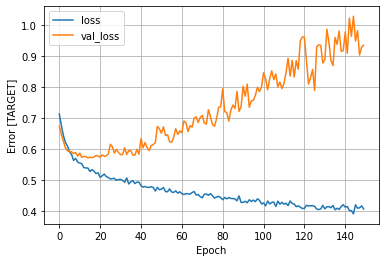

In [79]:
roc_nn6_p3_1 = nn_6(p3_1_xtrain,p3_1_xval,p3_1_ytrain,p3_1_yval) 

Roc_score: 0.790233850479126
Tiempo: 107.30537486076355


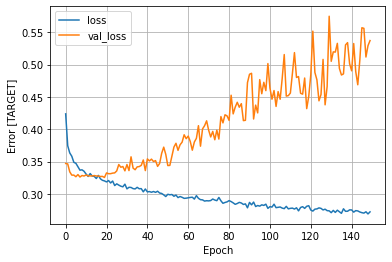

In [80]:
roc_nn6_p3_6 = nn_6(p3_6_xtrain,p3_6_xval,p3_6_ytrain,p3_6_yval)

# Submit Kaggle

In [96]:
def aprox(x):
    if(x>0.5):
        return 1
    else:
        return 0
    
aprox = np.vectorize(aprox)

In [93]:
def std_pca_kaggle(df_train,df_test):
    target = df_train.TARGET
    df_train = df_train.drop(['TARGET'],axis=1)
    #x_train, x_val, y_train, y_val = train_test_split(features,target,test_size=0.3,random_state=0,stratify=target)
    
    scaler = StandardScaler()
    scaled_features = scaler.fit(df_train)
    df_train = scaled_features.transform(df_train)
    df_test = scaled_features.transform(df_test)
    
    pca = PCA(0.99, random_state=random_state)
    pca.fit(df_train)
    df_train = pca.transform(df_train)
    df_test = pca.transform(df_test)
    print("Shapes df_train:",df_train.shape)
    print("Shapes df_test:",df_test.shape)
    
    return df_train,df_test,target

In [99]:
def nn_3_kaggle(df_train,df_test,target):
    ytrain = target
    xtrain = df_train
    dropout = 0.3
    loss = "binary_crossentropy"
    model = tf.keras.Sequential()
    model.add(Dense(50,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(15,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam')
    model.fit(xtrain, ytrain, epochs=150,verbose=0)
    return model.predict(df_test)

In [102]:
df_train_k,df_test_k,target = std_pca_kaggle(df_p2_6,df_test)
y_predicted = nn_3_kaggle(df_train_k,df_test_k,target)
y_predicted = aprox(y_predicted)

Shapes df_train: (21056, 120)
Shapes df_test: (75818, 120)


In [101]:
my_submission = pd.DataFrame(y_predicted,index=df_test.index,columns=["TARGET"]).to_csv("submission.csv")

#### Score Kaggle: 0.60819

# Conclusiones

En el dataset presentado se pudo ver un sparsity muy alto de 90% lo que llevó a una visualización de los valores de la data, llegando a reemplazar valores outlayers por las medias y medianas que tenían los mismos valores para cada una de las columnas de los primeros barplots del documento. Además se pudo ver una poca correlación entre los valores de la data pero un muy alto desbalance de los valores 1 y 0 presentes en la data lo cual nos da una clara idea de como poder preprocesar los datos en la siguiente sección.

Dentro del preprocesamiento se definen 3 funciones de pipeline donde la primera elimina las columnas duplicada, la segunda balancea el dataframe mediante under sampling quitando valores del tipo dominante y la tercera hace ambos procesos de preprocesamiento. Luego se crearon 5 dataframes los cuales se utilizaran a lo largo del proyecto a los cuales se les aplicó estandarización y PCA con la finalidad de tener datos representativos respecto a los originales.

Dentro del apartado de modelos tenemos el mejor desempeño con el modelo de bosques aplicado con una profundidad de 2, el cual arrojó los mejores valores de Roc_score llegando a un promedio de 0.70 dentro del valor. También se encuentra la Logistic Regression con valores de Roc_score alto comparados al resto, pero esta tuvo que balancear las clases para alcanzar estos resultados. Pero en general los demás modelos usados como SVC, Árboles o Gausiano NB presentan desempeño malo o mejor dicho no legible para su uso dentro de la elección de los modelos. Aunque de tomar una desición repecto a desempeño los mejores resultados se presentan a continuación con las redes neuronales.

En las redes neuronales usadas para la data se puede ver que el mejor desempeño considerando los tiempos de ejecución, el valor de Roc_score y el comportamiento de las curvas en general lo tiene la red neuronal de 3 capas, llegando al valor de Roc_score más alto de 0.80 apróx. además de un comportamiento de curvas con un overfitting más pequeño que el presente en la red de 6 capas, la cual presenta una separación de las curvas de loss y val_loss considerablemente grande. Además se muestra que el aumento de una capa a tres capas no altera mucho la suavidad de la curva de val_loss como lo es en el caso de 6 capas, lo que nos dice que el entrenamiento usando dropouts permite una suavidad que no genere picos en la curva de evalución. También importante mencionar que el pipeline 2 es el que en general independiente de las capas de las redes tiene los mejores resultados.